Random Reward
MDP with 10 states and 2 actions
discounting factor gamma = 0.95

The Policy is
(0,0) = 0.4835164835164835   (0,1) = 0.5164835164835165   
(1,0) = 0.48854961832061067   (1,1) = 0.5114503816793893   
(2,0) = 0.881578947368421   (2,1) = 0.11842105263157894   
(3,0) = 0.7980769230769231   (3,1) = 0.20192307692307693   
(4,0) = 0.2926829268292683   (4,1) = 0.7073170731707317   
(5,0) = 0.4430379746835443   (5,1) = 0.5569620253164557   
(6,0) = 0.88   (6,1) = 0.12   
(7,0) = 0.4715447154471545   (7,1) = 0.5284552845528455   
(8,0) = 0.30952380952380953   (8,1) = 0.6904761904761905   
(9,0) = 0.34328358208955223   (9,1) = 0.6567164179104478   

Number of Iterations to achieve a Value Function:    86

Value Function:   [10.32698916 10.28997413 10.61215495 10.47182536 10.53804012 10.44741659
 10.58984017 10.28781177 10.42280426 10.27326007]


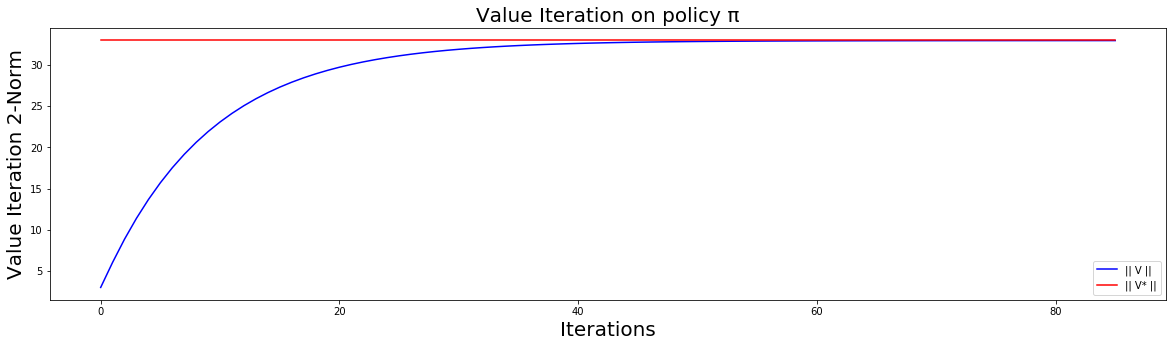

When reward are all 1
MDP with 10 states and 2 actions
discounting factor gamma = 0.95

The Policy is
(0,0) = 0.4835164835164835   (0,1) = 0.5164835164835165   
(1,0) = 0.48854961832061067   (1,1) = 0.5114503816793893   
(2,0) = 0.881578947368421   (2,1) = 0.11842105263157894   
(3,0) = 0.7980769230769231   (3,1) = 0.20192307692307693   
(4,0) = 0.2926829268292683   (4,1) = 0.7073170731707317   
(5,0) = 0.4430379746835443   (5,1) = 0.5569620253164557   
(6,0) = 0.88   (6,1) = 0.12   
(7,0) = 0.4715447154471545   (7,1) = 0.5284552845528455   
(8,0) = 0.30952380952380953   (8,1) = 0.6904761904761905   
(9,0) = 0.34328358208955223   (9,1) = 0.6567164179104478   

Number of Iterations to achieve a Value Function:    124

Value Function:   [19.99886058 19.99886078 19.99887631 19.99890585 19.99889394 19.99893618
 19.99890931 19.99891117 19.99879468 19.99893015]


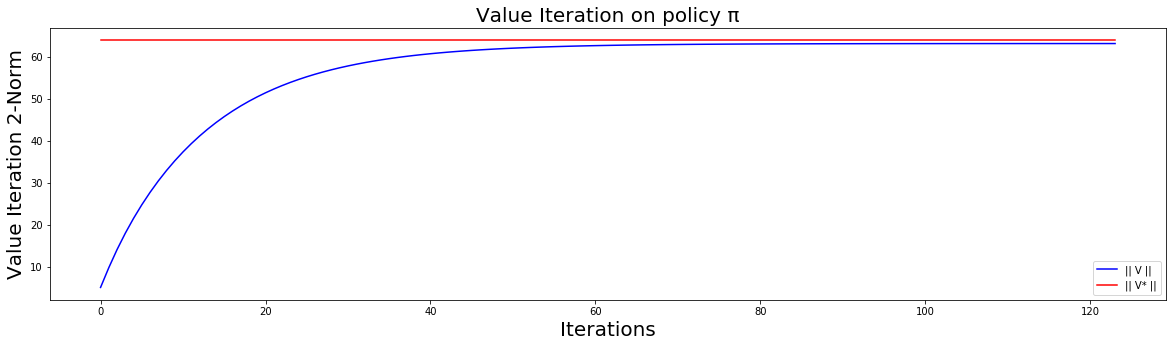

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdptoolbox.example
import math


class ValueIterator:
    """
    Class that will ues on policy temporal difference
    prediction to solve the model free problem with a given policy

    """

    def __init__(self, states, actions, policy, gamma=0.95, theta= 0.0001):
        #action value function, mapping each state action pair
        #initialized to have 0 for every new state action pair
        self.V = np.zeros(states)

        #discount rate between [0,1]
        self.gamma = gamma

        #saving the amount of states and actions
        self.states = states
        self.actions = actions
        
        #the policy to evaluate
        self.policy = policy
        
        #Transition Probability and Reward Shape: AxSxS'
        self.transitionProbabilities, self.rewardMatrix = mdptoolbox.example.rand(states,actions)
        #the reward matrix in the shape: AxSxS
        self.rewardMatrix = np.random.rand(actions,states, states)
        
        #theta stopping threshold on when to stop running value iteration
        self.theta = theta

        #save the values to plot later
        self.plot = []
        
        #amount of iterations that occurred
        self.iterations = 0
        
        
    def setRewardMatrix(self,matrix):
        """
        Change the reward matrix to whatever you want with this function
        Must be called before running value iteration
        
        For this to work
        Matrix needs to be in shape AxSxS
        A is the Action space
        S is the State space
        """
        self.rewardMatrix = matrix
        
    def getValue(self,state):
        """
        Just return the value of the state action pair given the current estimate of the environment
        :param state: observation that was previously seen
        :param action: action that was take
        :return: the value of that state action pair
        """

        return self.value_function[state]



    def getValueVector(self):
        """
        for the ability to plot the value function getting the values of all the states as a vector
        return: a list of all the values
        """
        
        values = []
        for state in range(self.states):
            values.append(self.value_function[state])
        return np.array(values)

    def bellmanUpdate(self,state):
        """
        Carry Out the update for the Value Function
        param: state is the state that the iteration is currently working on
        return: a list of all the values each action calculates
        will be used later to find the policy as well
        """
        
        total = 0
        new_total = 0
        for a in range(self.actions):
            total=0
            for s_prime in range(self.states):
                total+= self.transitionProbabilities[a][state][s_prime]*(self.rewardMatrix[a][state][s_prime]+self.gamma*self.V[s_prime])
            new_total+= self.policy[state][a]*total
            
        return new_total
    
    
    def valueIteration(self):
        """
        Perform Value Iteration on the given MDP 
        
        will provide a optimal deterministic policy for this MDP
        will Plot the V(s) function as well 
        """
        
        delta = float("inf")
        
        #value iteration
        while(delta > self.theta):
            delta = 0
            for s in range(self.states):
                v = self.V.copy()
                
                #bellman update
                self.V[s] = np.max(self.bellmanUpdate(s))
    
                delta = max(delta, abs(self.V[s]-v[s]))
            
            norm = np.linalg.norm(self.V)
            self.plot.append(norm)
            self.iterations+=1
        
    
    
    def plot(self):
        #Plotting the Difference between the limit of the Value Function and the value function each iteration
        #The Value function limit seems to be a Value Function with a 2-norm approaching around 16
        
        print(f"MDP with {self.states} states and {self.actions} actions\ndiscounting factor gamma = {self.gamma}\n")

        
        #print the policy
        print("The Policy is")
        for s in range(self.states):
            for a in range(self.actions):
                print(f"({s},{a}) = {self.policy[s][a]}  ",end=" ")
            print()
                      
        
        print("\nNumber of Iterations to achieve a Value Function:   ", self.iterations)
        print("\nValue Function:  ", self.V)
        
        #plot the value iteration plot
        plt.figure(figsize = (20,5))
        plt.plot(range(self.iterations), self.norm, "b-", label = "|| V ||")
        plt.plot(range(self.iterations),np.zeros(self.iterations)+math.ceil(self.norm[-1]),"r-", label = "|| V* ||")
        plt.xlabel("Iterations", fontsize = 20)
        plt.ylabel("Value Iteration 2-Norm",fontsize = 20)
        plt.title("Value Iteration on policy π",fontsize = 20)
        plt.legend()
        plt.show()
        
  

if __name__ == '__main__':
    """
    The Main Function to Run your program
    Example code given below
    All hyperparameters can be adjusted to your liking
    
    
    Policy must be given  
    the policy will be in the format of 
    (state,action) = Probability
    
    in python code it will be a dictionary inside of a dictionary
    {state: {action: probability of that action, action: probabiity, ... } state:{...}}
    """

    #to keep the random generator values same each time the program is run
    np.random.seed(0)
    states = 10
    actions = 2
    
    policy = {0: {0: 0.4835164835164835, 1: 0.5164835164835165}, 1: {0: 0.48854961832061067, 1: 0.5114503816793893}, 2: {0: 0.881578947368421, 1: 0.11842105263157894}, 3: {0: 0.7980769230769231, 1: 0.20192307692307693}, 4: {0: 0.2926829268292683, 1: 0.7073170731707317}, 5: {0: 0.4430379746835443, 1: 0.5569620253164557}, 6: {0: 0.88, 1: 0.12}, 7: {0: 0.4715447154471545, 1: 0.5284552845528455}, 8: {0: 0.30952380952380953, 1: 0.6904761904761905}, 9: {0: 0.34328358208955223, 1: 0.6567164179104478}}
    
    print("Random Reward")
    learner = ValueIterator(policy = policy,states = states, actions = actions, theta = 0.0001)
    learner.valueIteration()
    learner.plot()
    
    print("When reward are all 1")
    learner = ValueIterator(policy = policy,states = states, actions = actions, theta = 0.0001)
    matrix = np.ones((actions, states, states))
    learner.setRewardMatrix(matrix)
    learner.valueIteration()
    learner.plot()
